<a href="https://colab.research.google.com/github/dmahali1983/Machine-Learning/blob/master/DeepLearning_MulticlassClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Created neural network with make blob Datasets
# Split the training and test data
# Visuallize the data with Scatter plot
# Evaluate loss with CrossEntropyLoss
# optimize with Adam optimizer
# 1 hidden layers with 100 nurons
# plot the decision boundary for CrossEntropyLoss with 100 epochs

In [3]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from torchsummary import summary


from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


from IPython.display import clear_output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [17]:
X, y = make_blobs(n_samples = 1000, random_state=23, centers = 4)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=22)


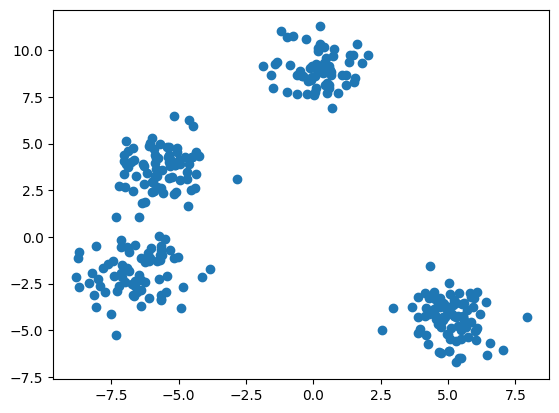

In [18]:
plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

In [19]:
X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)



In [20]:
class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 100)
        self.fcout = nn.Linear(100, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.relu(x)
        x = self.fcout(x)
        return x





In [21]:
num_epochs = 100
learning_rate = 0.01
model = Net(2,4)
criterianCE = nn.CrossEntropyLoss()
train = data_utils.TensorDataset(X_train, y_train)
train_loader50 = data_utils.DataLoader(train , batch_size=50 , shuffle=True)

def run(num_epochs, learning_rate= 0.01, bench = True):


  model= Net(2,4)
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  model.train()

  start = time.time()

  for i in range(0, num_epochs):

    for batch_idx, (data, labels) in enumerate(train_loader50):
      data = data.to(device)
      labels = labels.to(device)
      labels = labels.to(torch.int64)
      outputs = model(data)

      loss = criterianCE(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()
  if bench:
    print(f'training completed in {end-start}s')

  return model





In [22]:
def plot_decision(X,y, model, size=(8,8), output_class = False, pt = False, device='cpu' , text_pred=False, softmax=False):

  h = 0.2

  X_min, X_max = X[:,0].min() -1 , X[:, 0].max() + 1
  y_min, y_max = X[:,1].min() -1 , X[:,1].max() + 1
  XX, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min,y_max,h))
  fig, ax = plt.subplots(figsize = size)

  if pt:

    model.eval()
    input = torch.from_numpy(np.c_[XX.ravel(), yy.ravel()]).float().to(device)
    outputs = model(input)
    if softmax:
      outputs = outputs.data.max(1, keepdim=True)[1]
    Z = outputs.detach().cpu().numpy()


    Xt = torch.from_numpy(X).to(device).float()
    pred = model(Xt)

    if not softmax:
      pred = np.where(pred.detach().cpu().numpy() > 0.5, 1, 0).flatten()
    else:
      pred = pred.detach().cpu().numpy().flatten()

  else:
    Z = model.predict(np.c_[XX.ravel(), yy.ravel()])

  if output_class:
    Z = Z > 0.5

  Z = Z.reshape(XX.shape)
  ax.contourf(XX, yy, Z)
  ax.axis('on')

  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  if text_pred:
    plt.title(f'pred: {pred}')
  plt.show()





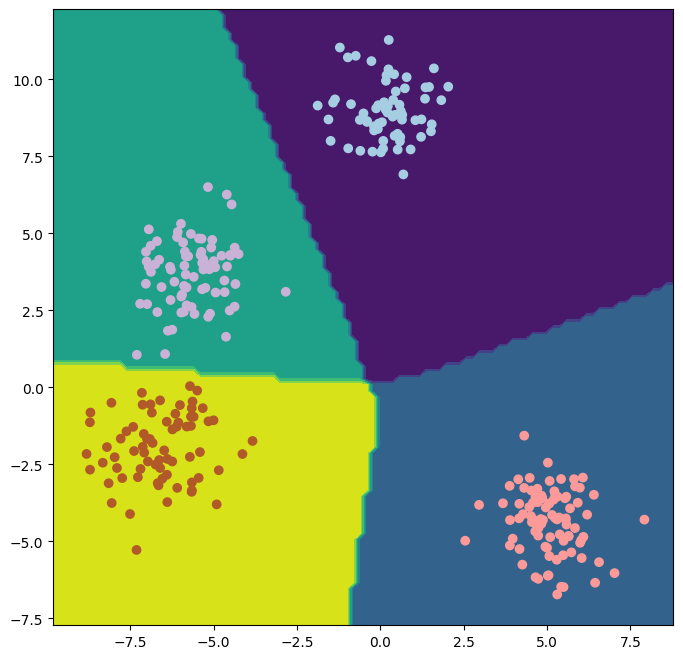

In [23]:

from IPython.display import clear_output
import time


for i in range (30):
  clear_output(wait=True)
  model = run(i, learning_rate = 0.01, bench = False)
  plot_decision(X_test,y_test,model, pt = True, device='cuda', softmax=True)
  time.sleep(0.2)




In [24]:
outputs = model(torch.from_numpy(X_test).float().to(device))
print(outputs.shape)
pred = outputs.data.max(1, keepdim=True)[1].flatten()
print(pred[:10])

torch.Size([300, 4])
tensor([3, 3, 2, 0, 1, 2, 0, 2, 3, 1], device='cuda:0')


In [25]:
print(model)

Net(
  (fcin): Linear(in_features=2, out_features=100, bias=True)
  (fcout): Linear(in_features=100, out_features=4, bias=True)
)
